# CRISP-DM Project on COVID-19 Identification using X-rays

## Business understanding

The goal of this project is to develop a machine learning model that can accurately identify COVID-19 positive cases, normal cases, and viral pneumonia cases from chest X-ray images. This model could be used in clinical settings to support the diagnosis of COVID-19, and to aid in the prioritization of medical care for patients.

Additionally, the dataset could be used to conduct research studies on the effectiveness of X-rays in detecting COVID-19 and other respiratory diseases, and to develop new approaches to medical imaging and analysis.

## Data Understanding
The original dataset was created by researchers from University of Qatar in Doha and University of Dhaka in Bangladesh, and is composed by 21165 pictures of lung radiographies and their respective segmentations; said pictures are divided as it follows:
- Normal (10.192)
- COVID-19 Positive (3.616)
- Other viral pneumonias (1.345)
- Non-COVID related lung opacity x-rays. (6.012)

As it is a large dataset, it has been reduced to only two categories, Normal and COVID-19, and their sizes have been reduced to 3000 and 1989 samples respectively to improve efficency.

## Business Goals
- Develop a ML model that can aid medical professionals in the differential diagnosis of COVID-19
- Aid in the priorization of medical care for patients
- Conduct research studies on the effectiveness of X-rays in detecting COVID-19.


## Acceptance metrics
- Accuracy of the ML model against new radiographies
- Sensitivity and specificity of the model in detecting COVID-19
- Sensitivity and specificity of the model classifying normal radiographies

## Data analysis and processing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Establecimiento de la ruta y generación del dataframe.

In [4]:
levels = ['Normal/images','COVID/images']
path = '/content/drive/MyDrive/Colab Notebooks/COVID19'
data_dir = os.path.join(path)

data = []
for id, level in enumerate(levels):
  for file in os.listdir(os.path.join(data_dir,level)):
    data.append(['{}/{}'.format(level,file),level])
data
data = pd.DataFrame(data,columns = ['image_file','corona_result'])
data['path'] = path + '/' + data['image_file']
data['corona_result'] = data['corona_result'].map({'Normal/images':'Negative','COVID/images':'Positive'})
samples = 4989
data.head

<bound method NDFrame.head of                          image_file corona_result  \
0      Normal/images/Normal-262.png      Negative   
1     Normal/images/Normal-2835.png      Negative   
2     Normal/images/Normal-2684.png      Negative   
3     Normal/images/Normal-2754.png      Negative   
4     Normal/images/Normal-2770.png      Negative   
...                             ...           ...   
4984    COVID/images/COVID-1849.png      Positive   
4985    COVID/images/COVID-1842.png      Positive   
4986     COVID/images/COVID-184.png      Positive   
4987    COVID/images/COVID-1972.png      Positive   
4988    COVID/images/COVID-1927.png      Positive   

                                                   path  
0     /content/drive/MyDrive/Colab Notebooks/COVID19...  
1     /content/drive/MyDrive/Colab Notebooks/COVID19...  
2     /content/drive/MyDrive/Colab Notebooks/COVID19...  
3     /content/drive/MyDrive/Colab Notebooks/COVID19...  
4     /content/drive/MyDrive/Colab Notebook

### Cálculo de muestras duplicadas y nulas

In [5]:
print('Duplicated: %d',data.duplicated().sum())
print('Null: %d',data.isnull().sum())

Duplicated: %d 0
Null: %d image_file       0
corona_result    0
path             0
dtype: int64


### Diagrama de casos.

In [6]:
df = pd.DataFrame()
df['corona_result']=['Positive','Negative']
df['Count']=[len(data[data['corona_result']=='Positive']),len(data[data['corona_result']=='Negative'])]
df = df.sort_values(by=['Count'],ascending=False)
import plotly.express as px
fig = px.bar(df,x='corona_result',y='Count',color = 'corona_result',text_auto='',width=600,template='plotly_dark')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [7]:
for dir in os.listdir(path):
  joined = os.path.join(path, dir)
  if os.path.isdir(joined):
    number_of_pictures = len(os.listdir(joined))
print(number_of_pictures)
data.head()

2


,image_file,corona_result,path
0,Normal/images/Normal-262.png,Negative,/content/drive/MyDrive/Colab Notebooks/COVID19...
1,Normal/images/Normal-2835.png,Negative,/content/drive/MyDrive/Colab Notebooks/COVID19...
2,Normal/images/Normal-2684.png,Negative,/content/drive/MyDrive/Colab Notebooks/COVID19...
3,Normal/images/Normal-2754.png,Negative,/content/drive/MyDrive/Colab Notebooks/COVID19...
4,Normal/images/Normal-2770.png,Negative,/content/drive/MyDrive/Colab Notebooks/COVID19...


### Creación del campo de imágenes en el dataframe.

*Este proceso es demorado, así justificamos la reducción del dataset.*

In [8]:
from keras.preprocessing import image
from PIL import Image

data['image']=data['path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))




Exploración de datos


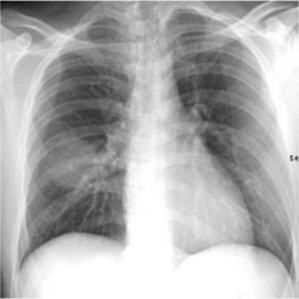

(0.0, 1.0, 0.0, 1.0)

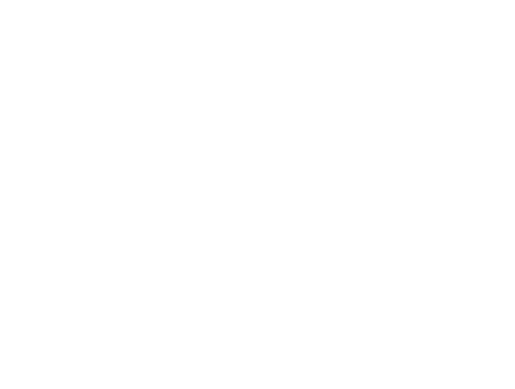

In [9]:
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/COVID19/COVID/images/COVID-1002.png",cv2.IMREAD_UNCHANGED)
cv2_imshow(image)
plt.axis('off')

### Revisión por canales
Con el fin de determinar el canal de mayor información

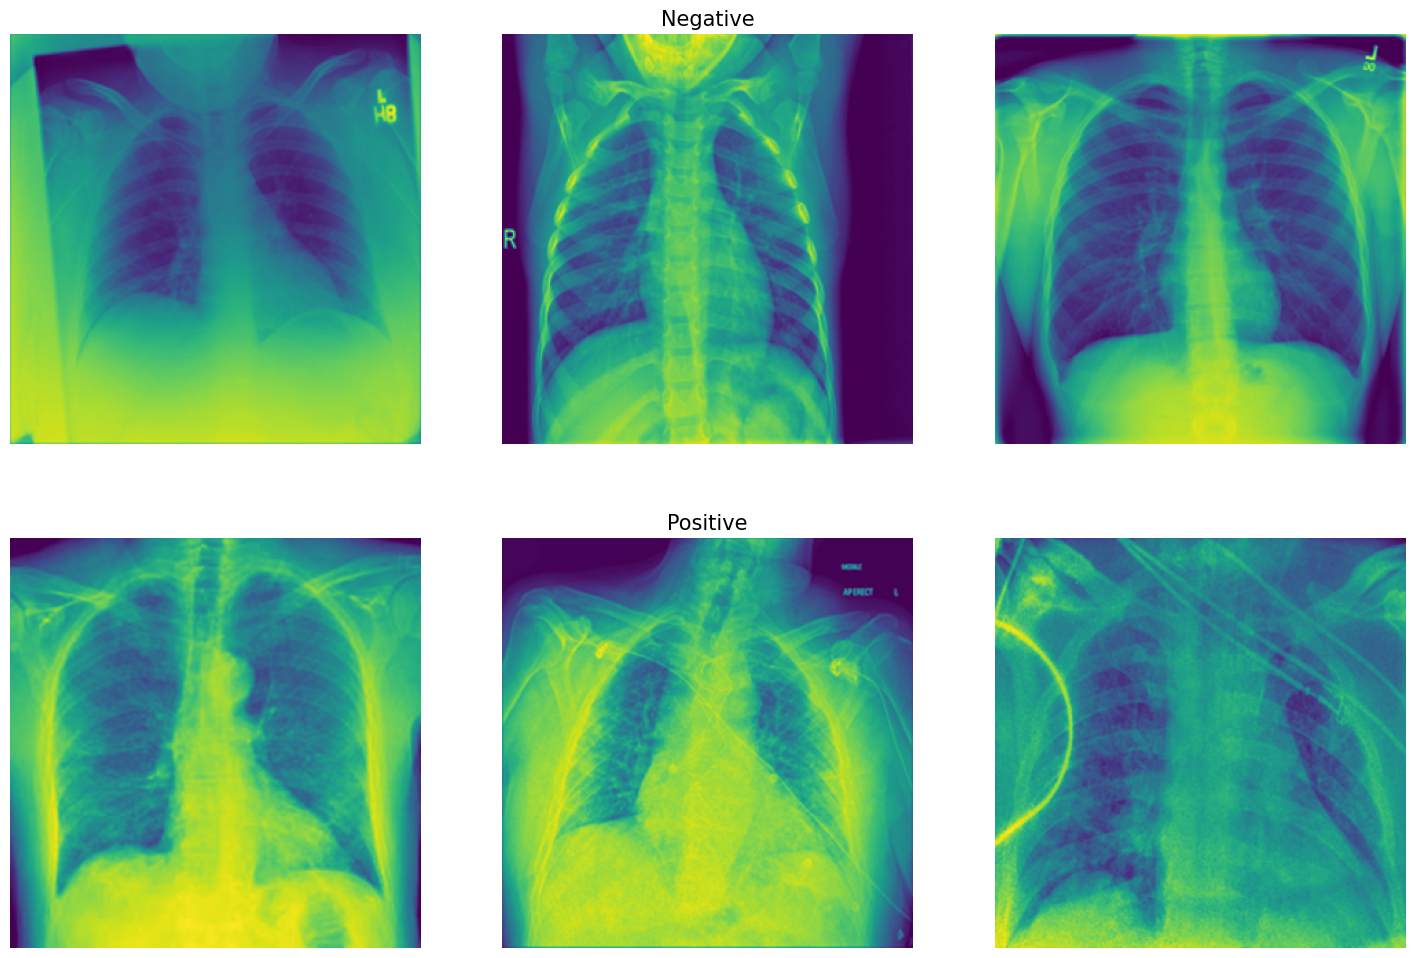

In [10]:
n_samples = 3
fig,m_axs = plt.subplots(2,n_samples,figsize=(6*n_samples,3*4))

for n_axs, (type_name,type_rows) in zip(m_axs,data.sort_values(['corona_result']).groupby('corona_result')):
  n_axs[1].set_title(type_name,fontsize=15)
  for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 1234).iterrows()):
    picture = c_row['path']
    image = cv2.imread(picture)
    c_ax.imshow(image[ : , : , 0])
    c_ax.axis('off')

In [11]:
import scipy
from scipy import ndimage,fftpack

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning:

nperseg = 256 is greater than input length  = 75, using nperseg = 75



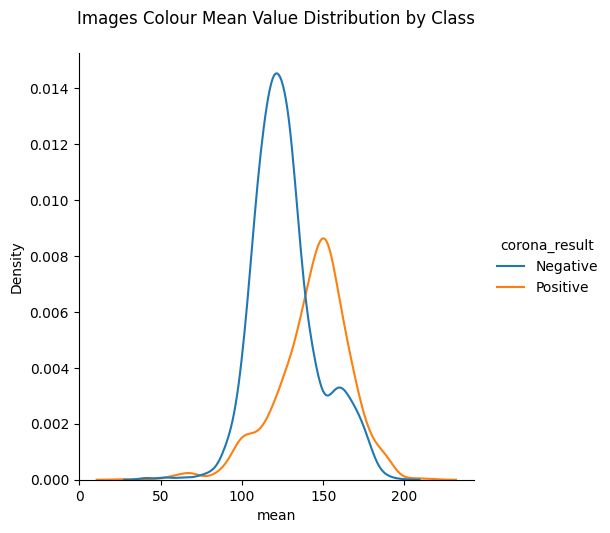

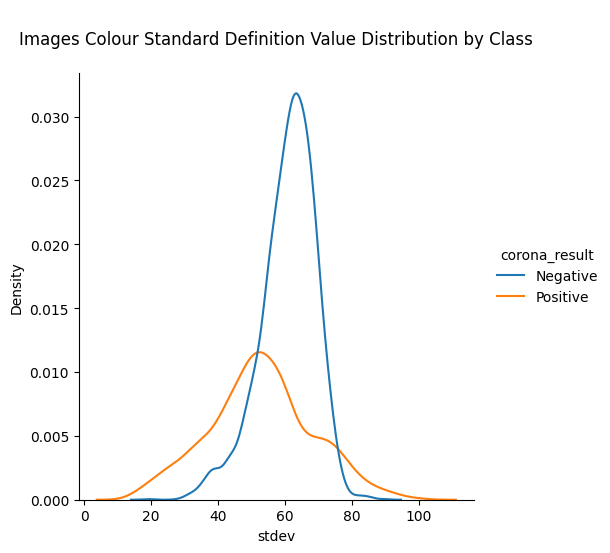

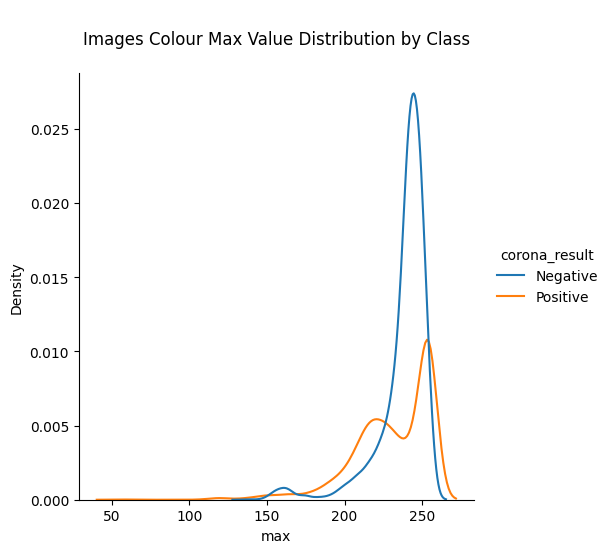

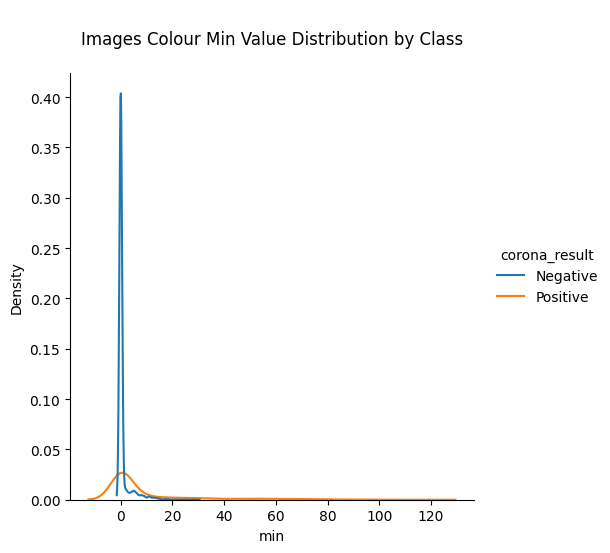

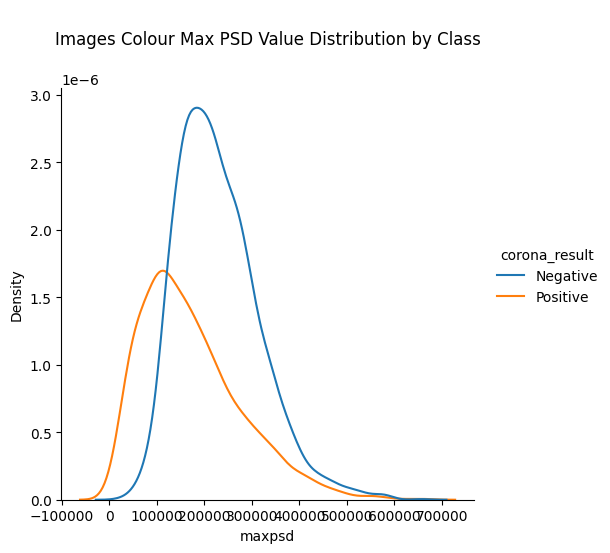

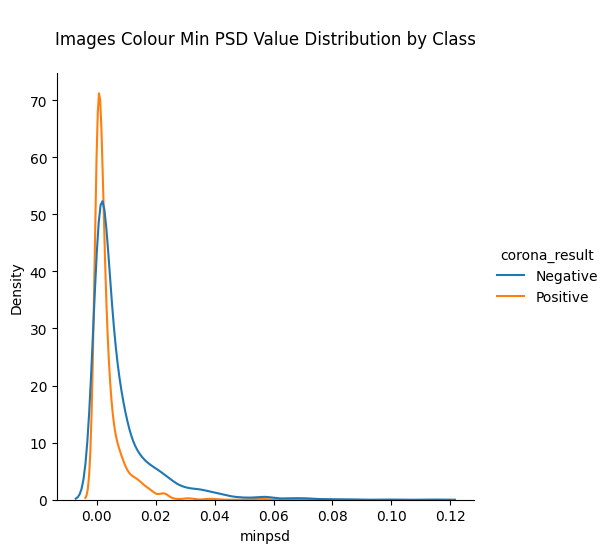

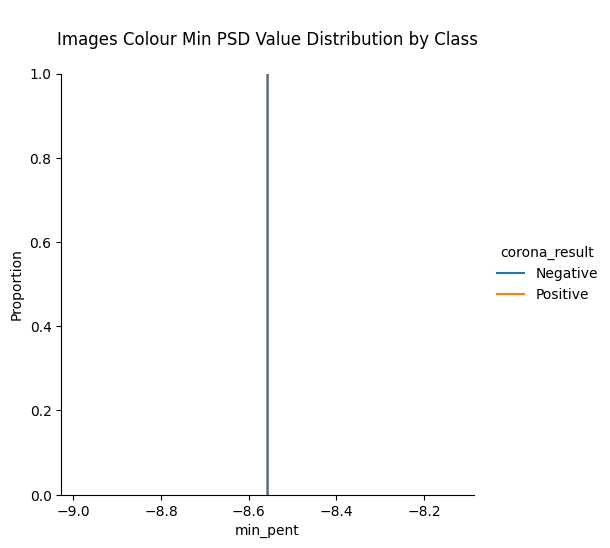

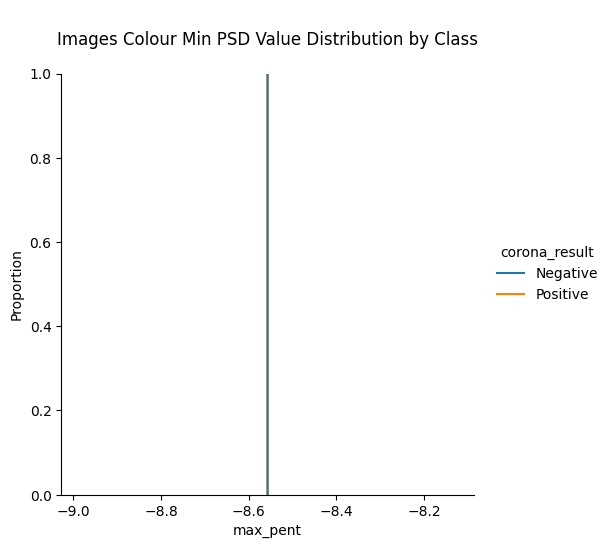

In [12]:
mean_val = []
std_val = []
max_val = []
min_val = []
max_psd = []
min_psd = []
min_pent = []
max_pent = []
for i in range(0, samples):
  mean_val.append(data['image'][i].mean())
  std_val.append(np.std(data['image'][i]))
  max_val.append(data['image'][i].max())
  min_val.append(data['image'][i].min())
  f,pxx_spec = scipy.signal.welch(data['image'][i])
  max_psd.append(pxx_spec.max())
  min_psd.append(pxx_spec.min())
  imgfft = scipy.fftpack.fftshift(fftpack.fft2(image))
  pspect = np.abs(imgfft) ** 2
  normspect = pspect/np.sum(pspect)
  spentropy = np.sum(normspect*np.log2(normspect + 1e-10))
  max_pent = spentropy.max()
  min_pent = spentropy.min()
EDA = data.loc[:,['image','corona_result','path']]
EDA['mean'] = mean_val
EDA['stdev'] = std_val
EDA['max'] = max_val
EDA['min'] = min_val
EDA['maxpsd'] = max_psd
EDA['minpsd'] = min_psd
EDA['entropy'] = spentropy
EDA['min_pent'] = min_pent
EDA['max_pent'] = max_pent

EDA['subt_mean'] = EDA['mean'].mean() - EDA['mean']

ax1 = sns.displot(data = EDA, x = 'mean', kind="kde", hue = 'corona_result');
plt.title('Images Colour Mean Value Distribution by Class\n', fontsize = 12);

ax4 = sns.displot(data = EDA, x = 'stdev', kind="kde", hue = 'corona_result');
plt.title('\nImages Colour Standard Definition Value Distribution by Class\n', fontsize = 12);

ax2 = sns.displot(data = EDA, x = 'max', kind="kde", hue = 'corona_result');
plt.title('\nImages Colour Max Value Distribution by Class\n', fontsize = 12);

ax3 = sns.displot(data = EDA, x = 'min', kind="kde", hue = 'corona_result');
plt.title('\nImages Colour Min Value Distribution by Class\n', fontsize = 12);

ax5 = sns.displot(data = EDA, x = 'maxpsd', kind="kde", hue = 'corona_result');
plt.title('\nImages Colour Max PSD Value Distribution by Class\n', fontsize = 12);

ax6 = sns.displot(data = EDA, x = 'minpsd', kind="kde", hue = 'corona_result');
plt.title('\nImages Colour Min PSD Value Distribution by Class\n', fontsize = 12);

ax7 = sns.displot(data = EDA, x = 'min_pent', kind = "ecdf", hue = 'corona_result');
plt.title('\nImages Colour Min PSD Value Distribution by Class\n', fontsize = 12);

ax8 = sns.displot(data = EDA, x = 'max_pent', kind="ecdf", hue = 'corona_result');
plt.title('\nImages Colour Min PSD Value Distribution by Class\n', fontsize = 12);


fig.show()

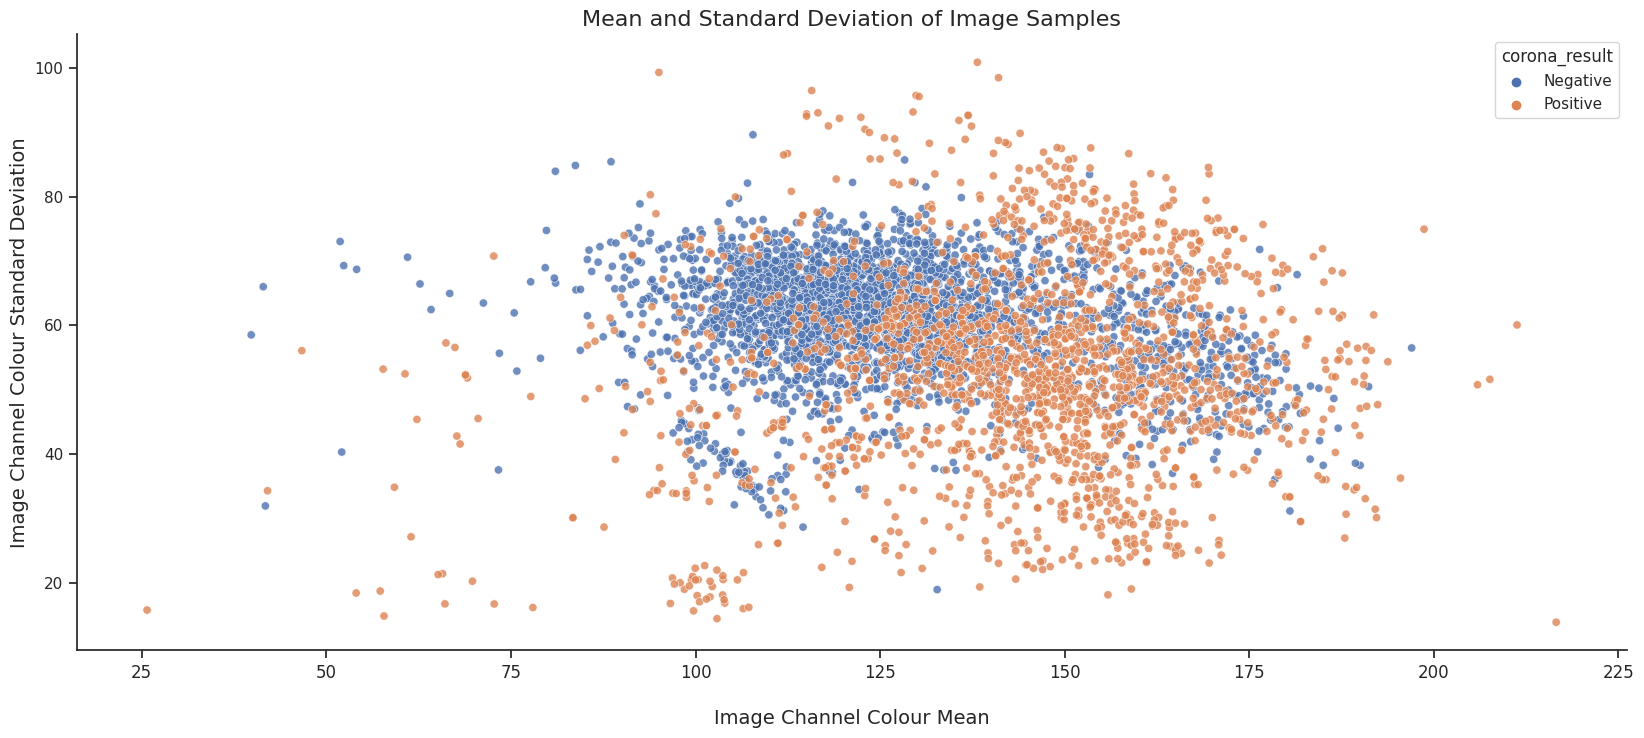

In [13]:
plt.figure(figsize = (20, 8))
sns.set(style = "ticks", font_scale = 1)
ax = sns.scatterplot(data = EDA, x = "mean", y = EDA['stdev'], hue = 'corona_result', alpha = 0.8);
sns.despine(top = True, right = True, left = False, bottom = False)
plt.xticks(rotation = 0, fontsize = 12)
ax.set_xlabel('\nImage Channel Colour Mean', fontsize = 14)
ax.set_ylabel('Image Channel Colour Standard Deviation', fontsize = 14)
plt.title('Mean and Standard Deviation of Image Samples', fontsize = 16);

In [14]:
all_data = []
for i in range(len(data)):
  image = cv2.imread(data['path'][i])
  image = cv2.resize(image,(70,70)) / 255
  label = 1 if data['corona_result'][i] == "Positive" else 0
  all_data.append([image,label])

In [15]:
from sklearn.model_selection import train_test_split

x=[]
y=[]
for image,label in all_data:
  x.append(image)
  y.append(label)

x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [16]:
from keras.preprocessing import image
from keras import layers, models
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,recall_score,accuracy_score,precision_score,f1_score

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3,3),activation='relu',input_shape=(70,70,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(units=16,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=2))
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 34, 34, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [18]:
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)

history = model.fit(x_train, y_train,
                        epochs = 50, batch_size = 256,
                        callbacks = [es])

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 0.7023 - accuracy: 0.5941

16/16 [==============================] - 71s 4s/step - loss: 0.7023 - accuracy: 0.5941
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.6041

16/16 [==============================] - 68s 4s/step - loss: 0.6774 - accuracy: 0.6041
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 0.6732 - accuracy: 0.6041

16/16 [==============================] - 67s 4s/step - loss: 0.6732 - accuracy: 0.6041
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 0.6398 - accuracy: 0.6041

16/16 [==============================] - 67s 4s/step - loss: 0.6398 - accuracy: 0.6041
Epoch 5/50
16/16 [==============================] - ETA: 0s - loss: 0.5678 - accuracy: 0.6041

16/16 [==============================] - 68s 4s/step - loss: 0.5678 - accuracy: 0.6041
Epoch 6/50
16/16 [==============================] - ETA: 0s - loss: 0.5578 - accuracy: 0.6041

16/16 [==============================] - 69s 4s/step - loss: 0.5578 - accuracy: 0.6041
Epoch 7/50
16/16 [==============================] - ETA: 0s - loss: 0.5472 - accuracy: 0.6041

16/16 [==============================] - 67s 4s/step - loss: 0.5472 - accuracy: 0.6041
Epoch 8/50
16/16 [==============================] - ETA: 0s - loss: 0.5386 - accuracy: 0.6680

16/16 [==============================] - 68s 4s/step - loss: 0.5386 - accuracy: 0.6680
Epoch 9/50
16/16 [==============================] - ETA: 0s - loss: 0.5253 - accuracy: 0.7058

16/16 [==============================] - 71s 4s/step - loss: 0.5253 - accuracy: 0.7058
Epoch 10/50
16/16 [==============================] - ETA: 0s - loss: 0.5240 - accuracy: 0.7018

16/16 [==============================] - 73s 4s/step - loss: 0.5240 - accuracy: 0.7018
Epoch 11/50
16/16 [==============================] - ETA: 0s - loss: 0.5235 - accuracy: 0.6961

16/16 [==============================] - 68s 4s/step - loss: 0.5235 - accuracy: 0.6961
Epoch 12/50
16/16 [==============================] - ETA: 0s - loss: 0.5097 - accuracy: 0.7063

16/16 [==============================] - 68s 4s/step - loss: 0.5097 - accuracy: 0.7063
Epoch 13/50
16/16 [==============================] - ETA: 0s - loss: 0.4982 - accuracy: 0.7206

16/16 [==============================] - 70s 4s/step - loss: 0.4982 - accuracy: 0.7206
Epoch 14/50
16/16 [==============================] - ETA: 0s - loss: 0.5027 - accuracy: 0.7124

16/16 [==============================] - 69s 4s/step - loss: 0.5027 - accuracy: 0.7124
Epoch 15/50
16/16 [==============================] - ETA: 0s - loss: 0.4796 - accuracy: 0.7409

16/16 [==============================] - 68s 4s/step - loss: 0.4796 - accuracy: 0.7409
Epoch 16/50
16/16 [==============================] - ETA: 0s - loss: 0.4812 - accuracy: 0.7379

16/16 [==============================] - 70s 4s/step - loss: 0.4812 - accuracy: 0.7379
Epoch 17/50
16/16 [==============================] - ETA: 0s - loss: 0.4655 - accuracy: 0.7580

16/16 [==============================] - 69s 4s/step - loss: 0.4655 - accuracy: 0.7580
Epoch 18/50
16/16 [==============================] - ETA: 0s - loss: 0.4640 - accuracy: 0.7514

16/16 [==============================] - 76s 5s/step - loss: 0.4640 - accuracy: 0.7514
Epoch 19/50
16/16 [==============================] - ETA: 0s - loss: 0.4560 - accuracy: 0.7620

16/16 [==============================] - 68s 4s/step - loss: 0.4560 - accuracy: 0.7620
Epoch 20/50
16/16 [==============================] - ETA: 0s - loss: 0.4456 - accuracy: 0.7712

16/16 [==============================] - 69s 4s/step - loss: 0.4456 - accuracy: 0.7712
Epoch 21/50
16/16 [==============================] - ETA: 0s - loss: 0.4348 - accuracy: 0.7793

16/16 [==============================] - 70s 4s/step - loss: 0.4348 - accuracy: 0.7793
Epoch 22/50
16/16 [==============================] - ETA: 0s - loss: 0.4362 - accuracy: 0.7788

16/16 [==============================] - 69s 4s/step - loss: 0.4362 - accuracy: 0.7788
Epoch 23/50
16/16 [==============================] - ETA: 0s - loss: 0.4406 - accuracy: 0.7732

16/16 [==============================] - 69s 4s/step - loss: 0.4406 - accuracy: 0.7732
Epoch 24/50
16/16 [==============================] - ETA: 0s - loss: 0.4267 - accuracy: 0.7913

16/16 [==============================] - 69s 4s/step - loss: 0.4267 - accuracy: 0.7913
Epoch 25/50
16/16 [==============================] - ETA: 0s - loss: 0.4228 - accuracy: 0.7873

16/16 [==============================] - 70s 4s/step - loss: 0.4228 - accuracy: 0.7873
Epoch 26/50
16/16 [==============================] - ETA: 0s - loss: 0.4183 - accuracy: 0.7905

16/16 [==============================] - 69s 4s/step - loss: 0.4183 - accuracy: 0.7905
Epoch 27/50
16/16 [==============================] - ETA: 0s - loss: 0.4168 - accuracy: 0.7970

16/16 [==============================] - 74s 5s/step - loss: 0.4168 - accuracy: 0.7970
Epoch 28/50
16/16 [==============================] - ETA: 0s - loss: 0.4157 - accuracy: 0.7938

16/16 [==============================] - 70s 4s/step - loss: 0.4157 - accuracy: 0.7938
Epoch 29/50
16/16 [==============================] - ETA: 0s - loss: 0.4050 - accuracy: 0.8051

16/16 [==============================] - 69s 4s/step - loss: 0.4050 - accuracy: 0.8051
Epoch 30/50
16/16 [==============================] - ETA: 0s - loss: 0.3928 - accuracy: 0.8131

16/16 [==============================] - 70s 4s/step - loss: 0.3928 - accuracy: 0.8131
Epoch 31/50
16/16 [==============================] - ETA: 0s - loss: 0.3907 - accuracy: 0.8148

16/16 [==============================] - 71s 4s/step - loss: 0.3907 - accuracy: 0.8148
Epoch 32/50
16/16 [==============================] - ETA: 0s - loss: 0.4015 - accuracy: 0.8046

16/16 [==============================] - 69s 4s/step - loss: 0.4015 - accuracy: 0.8046
Epoch 33/50
16/16 [==============================] - ETA: 0s - loss: 0.4085 - accuracy: 0.8051

16/16 [==============================] - 68s 4s/step - loss: 0.4085 - accuracy: 0.8051
Epoch 34/50
16/16 [==============================] - ETA: 0s - loss: 0.4125 - accuracy: 0.7943

16/16 [==============================] - 71s 4s/step - loss: 0.4125 - accuracy: 0.7943
Epoch 35/50
16/16 [==============================] - ETA: 0s - loss: 0.3850 - accuracy: 0.8153

16/16 [==============================] - 68s 4s/step - loss: 0.3850 - accuracy: 0.8153
Epoch 36/50
16/16 [==============================] - ETA: 0s - loss: 0.3833 - accuracy: 0.8161

16/16 [==============================] - 69s 4s/step - loss: 0.3833 - accuracy: 0.8161
Epoch 37/50
16/16 [==============================] - ETA: 0s - loss: 0.3718 - accuracy: 0.8254

16/16 [==============================] - 71s 4s/step - loss: 0.3718 - accuracy: 0.8254
Epoch 38/50
16/16 [==============================] - ETA: 0s - loss: 0.3883 - accuracy: 0.8156

16/16 [==============================] - 70s 4s/step - loss: 0.3883 - accuracy: 0.8156
Epoch 39/50
16/16 [==============================] - ETA: 0s - loss: 0.3798 - accuracy: 0.8213

16/16 [==============================] - 69s 4s/step - loss: 0.3798 - accuracy: 0.8213
Epoch 40/50
16/16 [==============================] - ETA: 0s - loss: 0.3814 - accuracy: 0.8178

16/16 [==============================] - 70s 4s/step - loss: 0.3814 - accuracy: 0.8178
Epoch 41/50
16/16 [==============================] - ETA: 0s - loss: 0.3703 - accuracy: 0.8294

16/16 [==============================] - 69s 4s/step - loss: 0.3703 - accuracy: 0.8294
Epoch 42/50
16/16 [==============================] - ETA: 0s - loss: 0.3692 - accuracy: 0.8274

16/16 [==============================] - 70s 4s/step - loss: 0.3692 - accuracy: 0.8274
Epoch 43/50
16/16 [==============================] - ETA: 0s - loss: 0.3634 - accuracy: 0.8289

16/16 [==============================] - 70s 4s/step - loss: 0.3634 - accuracy: 0.8289
Epoch 44/50
16/16 [==============================] - ETA: 0s - loss: 0.3830 - accuracy: 0.8148

16/16 [==============================] - 69s 4s/step - loss: 0.3830 - accuracy: 0.8148
Epoch 45/50
16/16 [==============================] - ETA: 0s - loss: 0.3697 - accuracy: 0.8271

16/16 [==============================] - 70s 4s/step - loss: 0.3697 - accuracy: 0.8271
Epoch 46/50
16/16 [==============================] - ETA: 0s - loss: 0.3563 - accuracy: 0.8341

16/16 [==============================] - 70s 4s/step - loss: 0.3563 - accuracy: 0.8341
Epoch 47/50
16/16 [==============================] - ETA: 0s - loss: 0.3557 - accuracy: 0.8361

16/16 [==============================] - 69s 4s/step - loss: 0.3557 - accuracy: 0.8361
Epoch 48/50
16/16 [==============================] - ETA: 0s - loss: 0.3612 - accuracy: 0.8306

16/16 [==============================] - 69s 4s/step - loss: 0.3612 - accuracy: 0.8306
Epoch 49/50
16/16 [==============================] - ETA: 0s - loss: 0.3529 - accuracy: 0.8364

16/16 [==============================] - 70s 4s/step - loss: 0.3529 - accuracy: 0.8364
Epoch 50/50
16/16 [==============================] - ETA: 0s - loss: 0.3541 - accuracy: 0.8354

16/16 [==============================] - 69s 4s/step - loss: 0.3541 - accuracy: 0.8354


In [19]:
yp_train = model.predict(x_train)
yp_train = np.argmax(yp_train, axis = 1)


yp_test = model.predict(x_test)
yp_test = np.argmax(yp_test, axis = 1)

32/32 [==============================] - 4s 113ms/step


In [20]:
cm_train = confusion_matrix(y_train, yp_train)
t1 = ConfusionMatrixDisplay(cm_train)
s1 = round((cm_train[0,0]/(cm_train[0,0] + cm_train[0,1])),4)

print("Classification Report for Train Data\n")
print(classification_report(y_train, yp_train))
print("--------------------------------------------------------------------------")
print("Recall on Train Data: ", round(recall_score(y_train, yp_train),4))
print("Specificity on Train Data: ", s1)
print("Accuracy on Train Data: ", round(accuracy_score(y_train, yp_train),4))
print("Precision on Train Data: ", round(precision_score(y_train, yp_train),4))
print("F1 Score on Train Data: ", round(f1_score(y_train, yp_train),4))
print("--------------------------------------------------------------------------")


Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2411
           1       0.94      0.95      0.95      1580

    accuracy                           0.96      3991
   macro avg       0.96      0.96      0.96      3991
weighted avg       0.96      0.96      0.96      3991

--------------------------------------------------------------------------
Recall on Train Data:  0.95
Specificity on Train Data:  0.9627
Accuracy on Train Data:  0.9577
Precision on Train Data:  0.9434
F1 Score on Train Data:  0.9467
--------------------------------------------------------------------------


In [21]:
cm_test = confusion_matrix(y_test, yp_test)
t2 = ConfusionMatrixDisplay(cm_test)
s2 = round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4)

print("\nClassification Report for Test Data\n")
print(classification_report(y_test, yp_test))
print("--------------------------------------------------------------------------")
print("Recall on Test Data: ", round(recall_score(y_test, yp_test), 4))
print("Specificity on Test Data: ", s2)
print("Accuracy on Test Data: ", round(accuracy_score(y_test, yp_test), 4))
print("Precision on Test Data: ", round(precision_score(y_test, yp_test), 4))
print("F1 Score Test Data: ", round(f1_score(y_test, yp_test), 4))
print("--------------------------------------------------------------------------")


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       589
           1       0.91      0.89      0.90       409

    accuracy                           0.92       998
   macro avg       0.92      0.91      0.91       998
weighted avg       0.92      0.92      0.92       998

--------------------------------------------------------------------------
Recall on Test Data:  0.8875
Specificity on Test Data:  0.9389
Accuracy on Test Data:  0.9178
Precision on Test Data:  0.9098
F1 Score Test Data:  0.8985
--------------------------------------------------------------------------


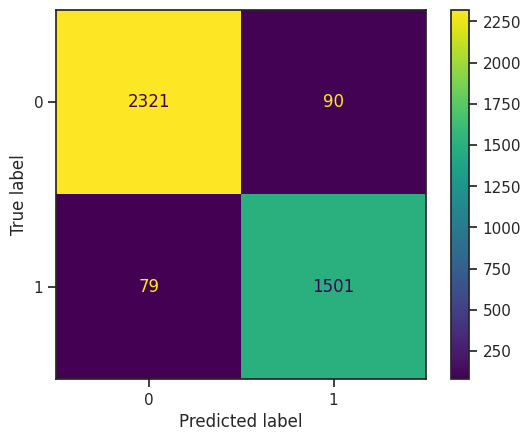

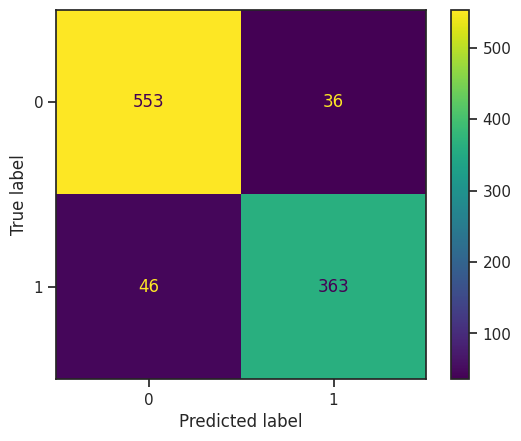

In [22]:
t1.plot()
t2.plot()

In [23]:
model.save('model.h5')

In [25]:
from sklearn.metrics import matthews_corrcoef,roc_auc_score

print("MCC: ", round(matthews_corrcoef(y_test, yp_test), 4))
print("ROC: ", round(roc_auc_score(y_test, yp_test), 4))


MCC:  0.8297
ROC:  0.9132
